<a href="https://colab.research.google.com/github/SummerProjectTEAM-10/Diabets-Prediction/blob/SREVARDHANI/Zscore_%2B_Lable_Encoding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [129]:
from google.colab import drive
drive.mount('/content/pro')


Drive already mounted at /content/pro; to attempt to forcibly remount, call drive.mount("/content/pro", force_remount=True).


In [130]:
#Installation of required libraries
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings("ignore")

In [131]:
#Reading the dataset
df = pd.read_csv("/content/pro/MyDrive/pima-indians-diabetes.csv")

In [132]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [133]:
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [134]:
def median_target(var):   
    temp = df[df[var].notnull()]
    temp = temp[[var, 'Outcome']].groupby(['Outcome'])[[var]].median().reset_index()
    return temp

In [135]:
# The values to be given for incomplete observations are given the median value of people who are not sick and the median values of people who are sick.
columns = df.columns
columns = columns.drop("Outcome")
for i in columns:
    median_target(i)
    df.loc[(df['Outcome'] == 0 ) & (df[i].isnull()), i] = median_target(i)[i][0]
    df.loc[(df['Outcome'] == 1 ) & (df[i].isnull()), i] = median_target(i)[i][1]

In [136]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
5,5,116.0,74.0,27.0,102.5,25.6,0.201,30,0
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
7,10,115.0,70.0,27.0,102.5,35.3,0.134,29,0
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
9,8,125.0,96.0,32.0,169.5,34.3,0.232,54,1


In [137]:
z = np.abs(stats.zscore(df))
print(z)

[[0.63994726 0.86462486 0.03218035 ... 0.46849198 1.4259954  1.36589591]
 [0.84488505 1.20472661 0.52812374 ... 0.36506078 0.19067191 0.73212021]
 [1.23388019 2.01426457 0.69343821 ... 0.60439732 0.10558415 1.36589591]
 ...
 [0.3429808  0.02224005 0.03218035 ... 0.68519336 0.27575966 0.73212021]
 [0.84488505 0.14199419 1.02406713 ... 0.37110101 1.17073215 1.36589591]
 [0.84488505 0.94195182 0.19749482 ... 0.47378505 0.87137393 0.73212021]]


In [138]:

threshold = 3
print(np.where(z > 3 ))

(array([  4,   8,  13,  18,  43,  45,  57,  58,  88, 106, 111, 120, 120,
       123, 125, 125, 153, 159, 177, 177, 186, 220, 228, 228, 247, 286,
       298, 330, 370, 370, 371, 392, 395, 409, 415, 445, 445, 445, 453,
       455, 459, 486, 549, 579, 584, 593, 597, 621, 645, 655, 666, 673,
       684, 691, 695, 753]), array([6, 4, 4, 2, 2, 6, 3, 6, 0, 2, 4, 3, 5, 7, 2, 5, 4, 0, 2, 5, 4, 4,
       4, 6, 4, 4, 0, 6, 4, 6, 6, 4, 6, 4, 4, 3, 5, 6, 7, 0, 7, 4, 2, 3,
       4, 6, 2, 6, 4, 4, 7, 5, 7, 2, 4, 4]))


In [139]:
print(z[4][6])

5.484909100466951


In [140]:
df.shape

(768, 9)

In [141]:
df = df [(z < 3).all(axis = 1)]
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
5,5,116.0,74.0,27.0,102.5,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,102.5,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,32.0,169.5,30.1,0.349,47,1


In [142]:
df.shape

(719, 9)

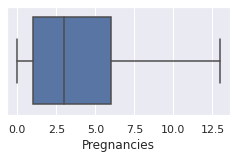

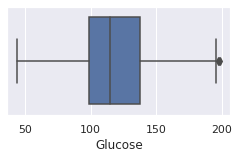

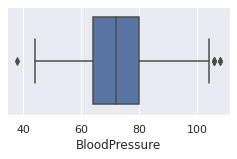

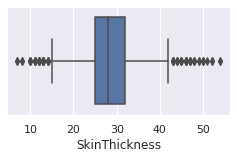

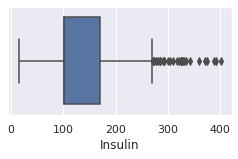

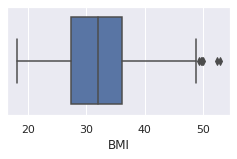

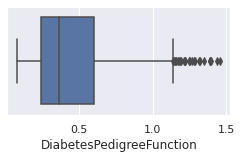

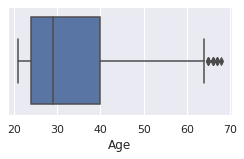

In [143]:
sns.set(style="whitegrid")

sns.set(rc={'figure.figsize':(4,2)})
sns.boxplot(x=df['Pregnancies'])
plt.show()
sns.boxplot(x=df['Glucose'])
plt.show()
sns.boxplot(x=df['BloodPressure'])
plt.show()
sns.boxplot(x=df['SkinThickness'])
plt.show()
sns.boxplot(x=df['Insulin'])
plt.show()
sns.boxplot(x=df['BMI'])
plt.show()
sns.boxplot(x=df['DiabetesPedigreeFunction'])
plt.show()
sns.boxplot(x=df['Age'])
plt.show()

In [144]:
# According to BMI, some ranges are determined and categorical variables are assigned.
NewBMI = pd.Series(["Underweight", "Healthy", "Overweight", "Obesity 1", "Obesity 2", "Obesity 3"], dtype = "category")
df["NewBMI"] = NewBMI
df.loc[df["BMI"] < 18.5, "NewBMI"] = NewBMI[0]
df.loc[(df["BMI"] > 18.5) & (df["BMI"] <= 24.9), "NewBMI"] = NewBMI[1]
df.loc[(df["BMI"] > 24.9) & (df["BMI"] <= 29.9), "NewBMI"] = NewBMI[2]
df.loc[(df["BMI"] > 29.9) & (df["BMI"] <= 34.9), "NewBMI"] = NewBMI[3]
df.loc[(df["BMI"] > 34.9) & (df["BMI"] <= 39.9), "NewBMI"] = NewBMI[4]
df.loc[df["BMI"] > 39.9 ,"NewBMI"] = NewBMI[5]

# A categorical variable creation process is performed according to the insulin value.
def set_insulin(row):
    if row["Insulin"] >= 16 and row["Insulin"] <= 166:
        return "Normal"
    else:
        return "Abnormal"
df = df.assign(NewInsulinScore=df.apply(set_insulin, axis=1))

# Some intervals were determined according to the glucose variable and these were assigned categorical variables.
NewGlucose = pd.Series(["Low", "Normal", "Prediabetes", "High"], dtype = "category")
df["NewGlucose"] = NewGlucose
df.loc[df["Glucose"] <= 70, "NewGlucose"] = NewGlucose[0]
df.loc[(df["Glucose"] > 70) & (df["Glucose"] <= 99), "NewGlucose"] = NewGlucose[1]
df.loc[(df["Glucose"] > 99) & (df["Glucose"] <= 126), "NewGlucose"] = NewGlucose[2]
df.loc[df["Glucose"] > 126 ,"NewGlucose"] = NewGlucose[3]
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI,NewInsulinScore,NewGlucose
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1,Obesity 1,Abnormal,High
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0,Overweight,Normal,Normal
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1,Healthy,Abnormal,High
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,Overweight,Normal,Normal
5,5,116.0,74.0,27.0,102.5,25.6,0.201,30,0,Overweight,Normal,Prediabetes


In [145]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
Le=LabelEncoder()
df['BMI_Lable'] = Le.fit_transform(df['NewBMI'])
df['Insulin_Lable'] = Le.fit_transform(df['NewInsulinScore'])
df['Glucose_Lable'] = Le.fit_transform(df['NewGlucose'])
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI,NewInsulinScore,NewGlucose,BMI_Lable,Insulin_Lable,Glucose_Lable
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1,Obesity 1,Abnormal,High,1,0,0
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0,Overweight,Normal,Normal,4,1,2
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1,Healthy,Abnormal,High,0,0,0
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,Overweight,Normal,Normal,4,1,2
5,5,116.0,74.0,27.0,102.5,25.6,0.201,30,0,Overweight,Normal,Prediabetes,4,1,3


In [146]:
df = df.drop(["NewBMI",	"NewInsulinScore", "NewGlucose"],axis=1)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BMI_Lable,Insulin_Lable,Glucose_Lable
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1,1,0,0
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0,4,1,2
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1,0,0,0
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,4,1,2
5,5,116.0,74.0,27.0,102.5,25.6,0.201,30,0,4,1,3


In [147]:
# Loading train_test_split for training and testing the dataset
from sklearn.model_selection import train_test_split

Split the dataset and train, test the model

In [148]:
# Train and test model
Features_Columns = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age','BMI_Lable','Insulin_Lable','Glucose_Lable']
#Features_Columns = ['Pregnancies','Glucose','Insulin','BMI','DiabetesPedigreeFunction','Age','BMI_Lable','Insulin_Lable','Glucose_Lable']
X = df[Features_Columns]  # INDEPENDENT VARIABLES
y = df["Outcome"]         # DEPENDENT VARIABLE
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [149]:
Random_Forest = RandomForestClassifier()
Random_Forest.fit(X_train , y_train)
y_pred_Random_Forest = Random_Forest.predict(X_test)


accuracy1_RF = Random_Forest.score(X_train, y_train)
print("Accuracy of train data = ", accuracy1_RF * 100, "%")
accuracy2_RF = Random_Forest.score(X_test, y_test)
print("Accuracy of test data = ", accuracy2_RF * 100, "%")

Accuracy of train data =  100.0 %
Accuracy of test data =  90.74074074074075 %
